
# 「人工智慧」輔助 RD 領用物料催還

WKS (WCD, WCQ 近似) RD 「長期保留」的物料的管法與 「ongoing projects」 的不同 (V360 定案)，「長期保留」的要用一整套 rule 用人工檢視篩選、以便催還，而且還不能為已經解釋過的事項重複打擾工程師，所以很辛苦，很不容易。

2017 秋引進 AI (Decision Tree) 來做篩選之後，半年來與人工篩選相比，accuracy 約 80% 上下。請 RD 庫房同仁 review 差異點也總是 AI 的被 reject, 沒有成功糾正過人工，效果不明顯。2018 春改用 DNN Classifier 之後，回溯舊資料來評估， accuracy 超過 90%。 2018 三月份的人工篩選好不容易也出錯了，立刻被 AI 發現！顯示 AI 的價值：節省人力，提升品質；原本人工篩選有錯是無人知曉的。

# WH300 Project 
### 應用 DNN Neural Network 自動勾選 over 300 天的領用催還

本程式調用其他附屬程式完成由「訓練」、「測試」、到「預測」各階段的工作，一方面示範這些附屬程式的用法。

本 project 由下列附屬程式組成：
- excel_to_data_label.ipynb ─ 把 excel 轉成 DNN 認得的 data frame
- feature_columns_for_DNN.ipynb ─ 針對庫房帳表各欄，轉述成 DNN 認得的資料類型
- DNNClassifier_Training.ipynb ─ 訓練 DNN 神經網路
- DNNClassifier_Evaluating.ipynb ─ 測試，跟人工的相比，看 DNN 預測的有多準。
- DNNClassifier_Predicting.ipynb ─ 預測，由 DNN 來勾選可疑的項目，以便催還。


# Get training data and label

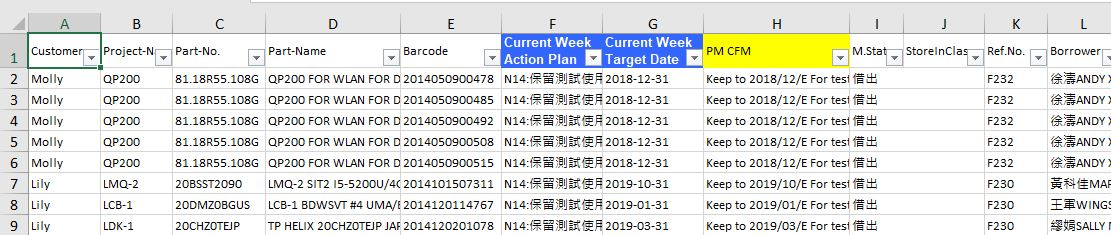

In [5]:
from IPython.display import display,Image;display(Image('excel-example.JPG', width=700))

`[ ]` 花點工夫用 Notepad++ 更新 BorrowerDEPT.txt 與 Customer.txt，從 excel 表中 copy 該等欄位過來排序並排除重複而已。<br>
`[ ]` 用 Aging column 排序，最老的在上。<br>
`[ ]` 照下表順序檢查 excel 帳表的欄位。

帳表欄位粗體打星的要嚴格照這個位置放，欄位名稱倒是可以有點變化無妨，沒有打星的只要 dummy 卡位即可。

|Column|Description| 
|:-|:-|
|***A**|***Customer**|
|***B**|***ProjectName**|
|***C**|***PartNo**|
|D|PartName|
|***E**|***Barcode**|
|F|CurrentWeek ActionPlan|
|G|CurrentWeek TargetDate|
|H|PM_CFM|
|I|MStatus|
|J|RefNo|
|K|StoreInClass|
|L|Borrower|
|M|BorrowerID|
|***N**|***BorrowerDEPT**|
|O|Dept|
|***P**|***QTY**|
|Q|Price|
|***R**|***Days**|
|***S**|***Tag**|

In [1]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\4月份W10W庫庫存報表.xlsx"
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [7]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\5月份W10W庫庫存報表tagged.xlsx"
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [13]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\6月W10W庫庫存.xlsx"
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [8]:
%run excel_to_data_label.ipynb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned OFF


<IPython.core.display.Javascript object>

(941, 7)
(941,)
Stored 'data_label' (tuple)


# Training the DNN Classifier 

In [9]:
%run DNNClassifier_Training.ipynb

(941, 7)
(941,)


<IPython.core.display.Javascript object>

Stored 'feature_columns' (list)


<IPython.core.display.Javascript object>

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025F266CE9B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/dnn\model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints fo

# Evaluate with test data 

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\8月份W10W庫庫存報表.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\9月份W10W庫庫存報表.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\10月份W10W庫庫存報表.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\11月份W10W庫庫存報表.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\201712.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [ ]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\201801.xlsx"
%store excel_file_of_a_month

In [ ]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

In [18]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\4月份W10W庫庫存報表.xlsx "
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [19]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned OFF


<IPython.core.display.Javascript object>

(852, 7)
(852,)
Stored 'data_label' (tuple)
核對一下 shapes 
(852, 7)
(852,)


<IPython.core.display.Javascript object>

Stored 'feature_columns' (list)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000180CBA7E908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-02:54:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/dnn\model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local

In [16]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\5月份W10W庫庫存報表tagged.xlsx"
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [17]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned OFF


<IPython.core.display.Javascript object>

(941, 7)
(941,)
Stored 'data_label' (tuple)
核對一下 shapes 
(941, 7)
(941,)


<IPython.core.display.Javascript object>

Stored 'feature_columns' (list)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000180CBFB4470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-02:53:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/dnn\model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local

In [20]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\6月W10W庫庫存.xlsx"
%store excel_file_of_a_month

Stored 'excel_file_of_a_month' (str)


In [21]:
%run excel_to_data_label.ipynb
%run DNNClassifier_Evaluating.ipynb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned OFF


XLRDError: No sheet named <'Detail'>

核對一下 shapes 
(852, 7)
(852,)


<IPython.core.display.Javascript object>

Stored 'feature_columns' (list)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000180CBD498D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-02:59:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/dnn\model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local

# Make a prediction for target data

可以直接來做 predicting 讓 AI 為陌生的帳表自動挑出該催還的項目，因為以前已經訓練好的「神經網路」保存在本 project 的 model/dnn 目錄下。

In [10]:
excel_file_of_a_month = r"c:\Users\hcche\WiBox\wh300\6月W10W庫庫存.xlsx"
%store excel_file_of_a_month
%run excel_to_data_label.ipynb

Stored 'excel_file_of_a_month' (str)


<IPython.core.display.Javascript object>

Automatic pdb calling has been turned OFF


<IPython.core.display.Javascript object>

(914, 7)
(914,)
Stored 'data_label' (tuple)


In [11]:
%run DNNClassifier_Predicting.ipynb

<IPython.core.display.Javascript object>

Stored 'feature_columns' (list)
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025F24CB0278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/dnn\model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### 以上 Predicted 結果即 predictions.csv 檔

# ── 完 ──